  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

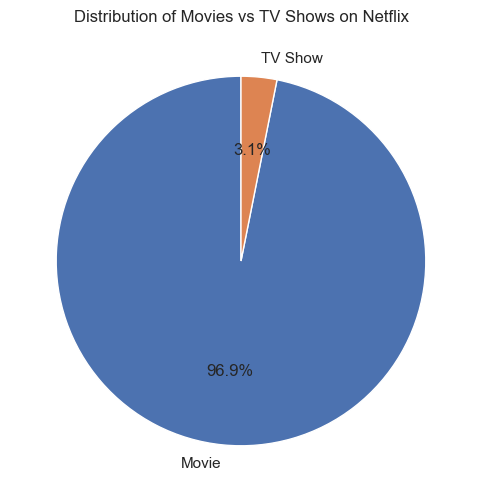

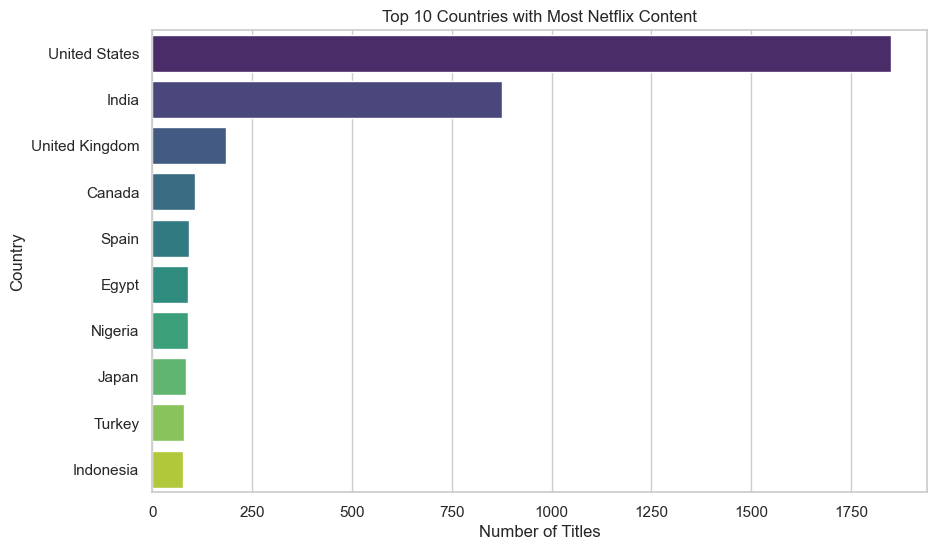

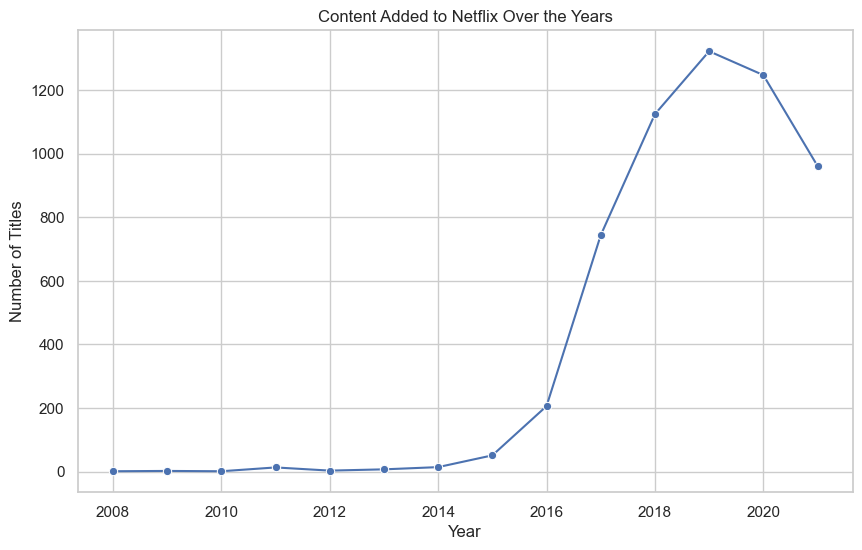

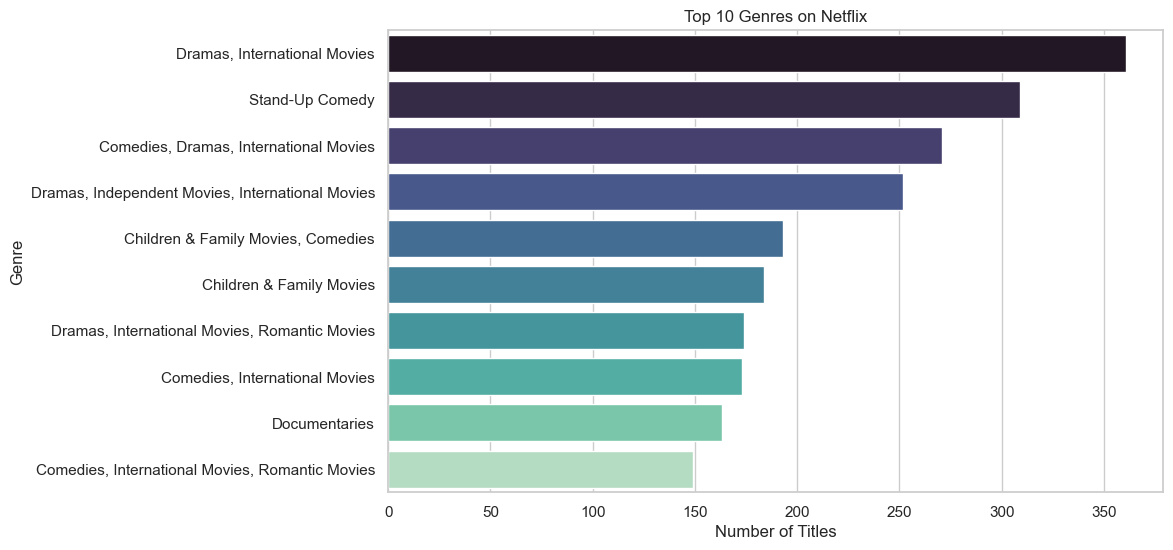

In [3]:
# Netflix EDA & Visualization
# Author: Yashaswini.S
# Internship: CodeAlpha - Data Analytics

# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv("netflix_titles.csv")

# Show first 5 rows
print(df.head())

# ==============================
# 3. Data Cleaning
# ==============================
print(df.isnull().sum())  # check missing values
df = df.dropna(subset=["director", "cast"])  # drop rows where director/cast missing

# Convert 'date_added' to datetime
df["date_added"] = pd.to_datetime(df["date_added"])

# ==============================
# 4. Exploratory Data Analysis
# ==============================

# Movies vs TV Shows count
content_count = df["type"].value_counts()
print(content_count)

plt.pie(content_count, labels=content_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.show()

# Top 10 countries producing Netflix content
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Content added over the years
df["year_added"] = df["date_added"].dt.year
yearly_content = df["year_added"].value_counts().sort_index()
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker="o")
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

# Top 10 genres
top_genres = df["listed_in"].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette="mako")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# ==============================
# 5. Save Clean Dataset
# ==============================
df.to_csv("netflix_clean.csv", index=False)
